NBA API

In [20]:
from nba_api.stats.static import teams
import pandas as pd
import matplotlib.pyplot as plt
from nba_api.stats.endpoints import leaguegamefinder

def one_dict(list_dict):
    keys = list_dict[0].keys()
    out_dict = {key:[] for key in keys}
    for list in list_dict:
        for k,v in list.items():
            out_dict[k].append(v)
    return out_dict


nba_df = pd.DataFrame(one_dict(teams.get_teams()))
nba_df.head()
nba_warriors = nba_df[nba_df['nickname'] == 'Warriors']
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=nba_warriors[['id']].values[0][0])
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22025,1610612744,GSW,Golden State Warriors,0022500449,2025-12-29,GSW @ BKN,None,161,67,...,0.833,6.0,19.0,25.0,16,6,4,8,15,3.2
1,22025,1610612744,GSW,Golden State Warriors,0022500441,2025-12-28,GSW @ TOR,L,265,127,...,0.893,14.0,28.0,42.0,25,9,9,20,20,-14.0
2,22025,1610612744,GSW,Golden State Warriors,0022500011,2025-12-25,GSW vs. DAL,W,241,126,...,0.923,13.0,36.0,49.0,33,9,4,11,22,10.0
3,22025,1610612744,GSW,Golden State Warriors,0022500407,2025-12-22,GSW vs. ORL,W,240,120,...,0.708,14.0,33.0,47.0,33,8,6,13,20,23.0
4,22025,1610612744,GSW,Golden State Warriors,0022500392,2025-12-20,GSW vs. PHX,W,240,119,...,0.750,17.0,32.0,49.0,29,9,7,20,22,3.0


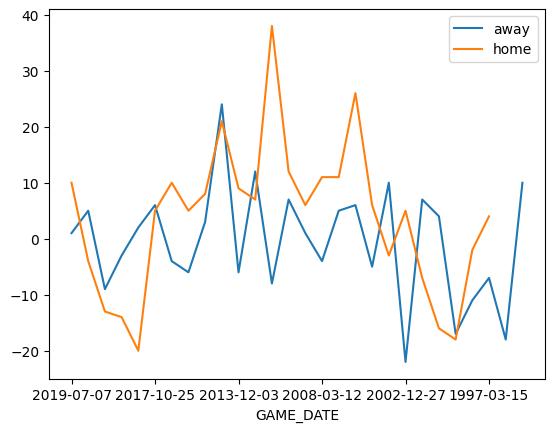

In [24]:
import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Golden_State.pkl")

file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']
games_home['PLUS_MINUS'].mean()
games_away['PLUS_MINUS'].mean()

fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()